# Correlación/Convolución.
## Motivacion
Asuma dos vectores $X=x_i$, $Y=y_i$ en $\mathbb{R}^n$.
Recuerden el producto interno (punto)

$$X \cdot y = \sum_i x_i y_i = \| X \| \| \ Y \| \cos \theta $$

Este producto punto se usa mucho  en ML. Incluso en LLM (Large Language Models). El producto punto se usa para **extraer similitudes** y **diferencias**.

Expliquemos
Sea, por ejemplo en 3 Dimensiones

$$X = \begin{pmatrix} 1  \\ - 10 \\ 5 \end{pmatrix} \quad , \quad Y = \begin{pmatrix} 10 \\ -100 \\ 50 \end{pmatrix} $$

Estos dos vectores son "muy distintos" en su tamano.

$$ \| X - Y \| = \sqrt{ 9^2 + 90^2 +45^2} = 101.02 $$

Aparentemente estos dos vectores son muy distintos. Pero en realida no. Ellos tienen **exactamente** la misma direccion. El uno es 10 veces el otro. Estan **perfectamente alineados**

Si calculamos el coseno

$$\cos \theta = \frac{X \cdot Y }{\| X \| \| Y \|}= 1.0 $$

El coseno es una medida de **similitud** en angulos. En el tratamiento de senales y en LLM, y en lo que veremos hoy, es mas importante que los datos (senales) est'en alineados. Pico-pico, valle valle.

* Si dos vectores estan perfectamente alineados el angulo es $0$, y $\cos \theta=1$

* Si dos vectores estan alineados en sentido contrario el angulo es $\pi=180^\circ$, y $\cos \theta=-1$

* Si los vectores no tienen ninguna relacion (no tiene correlacion). Entonces $\theta=90$ son ortogonales y $\cos \theta = 0$


Vamos a ver, con un ejemplo, como buscar zonas parecidas en senhales diferentes. Por ejemplo

$$f(\theta) = a_i \sin \theta $$
con $a_1=1$, $a_2=100$. Las dos senales son distintas en amplitude (una es 100 mas grande que la otra) pero tiene la misma fase.

Comenzamos por omitir en el coseno la division por $\| X \| \| Y \|$. Por que? realmente en la practica los datos se normalizan y
nos procupamos por $ X \cdot Y = \cos \theta$.

Veamos como se pueden comparar dos senales, una esta corrida con respecto a la otra.

$$f(t) = a_1 \cos ( t + \phi)  $$
$$g(t) = a_2 \cos ( t )  $$
Podemos usar $g(t)$ para hallar $\phi$ mediante "correlaciones".

Por simplicidad asumamos $a_1 = a_2 = 1$. De esta forma
$g(t + \tau)$ es una version de $g$ donde se corre $\tau$.

Lo que vamos a hacer para encontrar $\phi$, tomamos productos internos con $\tau=0, 0.1,0.2 \cdots $ y medimos estos productos internos, el maximo de todos ellos nos indica la maxima " correlacion " entre $f$ y $g$

En el continuo el producto interno es una integral. Escribimos

$$\langle f(t), g(t + \tau) \rangle = \int_D f(t) g(t + \tau) dt  $$

Este computo depende de $\tau$, $t$ es una variable "dummy"
Podemos llamar a esto:

$$h(\tau) = \langle f(t), g(t + \tau) \rangle = \int_D f(t) g(t + \tau) dt  \tag{0} $$

A esta formula $h(t)$ se llama correlacion cruzada (cross-correlation). La notaci'on en tratamiento de senales es

$$h(\tau) = f \circledast g $$
En Computer Science se nota

$$h(\tau) = f \ast g $$
 y lo llaman "convolucion".
 Al final de la clase les explico que realmente es convolucion.


Vamos entonces a encontrar $\phi$ de la senal $f$ usando la senal $g$ con corrimiento de fase ($\tau$)

$h(\tau) = f(t) \ast g(t) = \int_D f(t) g(t + \tau) = \int_0^{2 \pi}  \cos(t + \phi) \cos(t + \tau) dt = \pi \cos(\tau - \phi)  $

Es obvio que la maxima correlacion se da cuando $\tau=\phi$.

Esta integral es facil de calcular con la identidad

$$\cos \alpha \cos \beta = \frac{\cos ( \alpha + \beta) + \cos (\alpha - \beta)}{2} $$

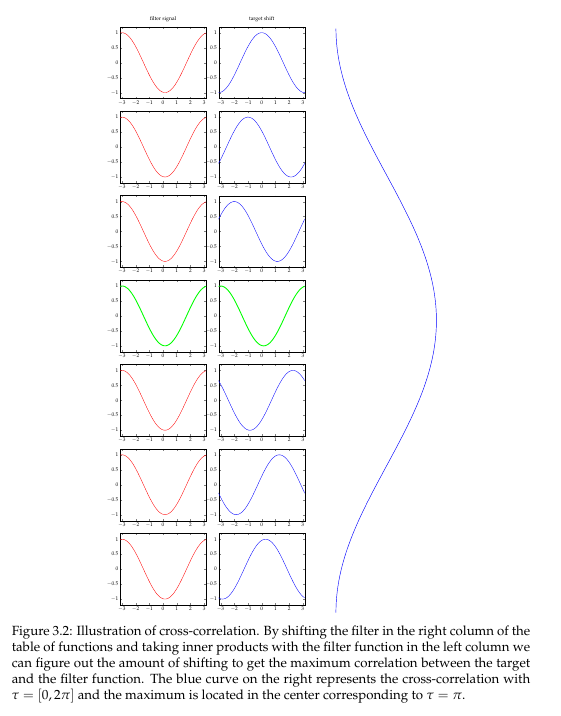

En el ejemplo de la figura 3.2 use $\tau=0,1, \cdots, 6$
Vemos en la figura que para $\tau=3$ (realmente $3.1415$) la correlacion es **maxima** y entonces all'i hay la mayor similitud.



Pasamos al discreto.

Definimos la correlacion de dos arreglos $x_i, y_i$, $i=1,2, \cdots, n$,

$$z_j = (x \ast y) = \sum_i y_i x_{i+j}  $$
Nombres: Aca $y$ es el filtro y $x$ los datos (en procesamiento de senales, es al contrario).
Debemos saber donde se mueven $i$, $j$? El indice de la suma.

* El numero de "muestras" de $x$ es $N_x$
* El numero de "muestras" de $y$ es $N_y$
Ahora bien, $x_{i+j}$ debe ser tal que $i+j$ no puede pasar de $N_x$ (en computaci'on es overflow. OBE: Out of Boundary Error).

$$ 0 \le i+j < N_x \quad , \quad 0 \le i < N_y $$


Con esto
$$z_j = (x \ast y) = \sum_0^{N_y-1} y_i x_{i+j} \quad , \quad j=0, 1, \cdots, , N_x - N_y $$

Veamos un ejemplo.


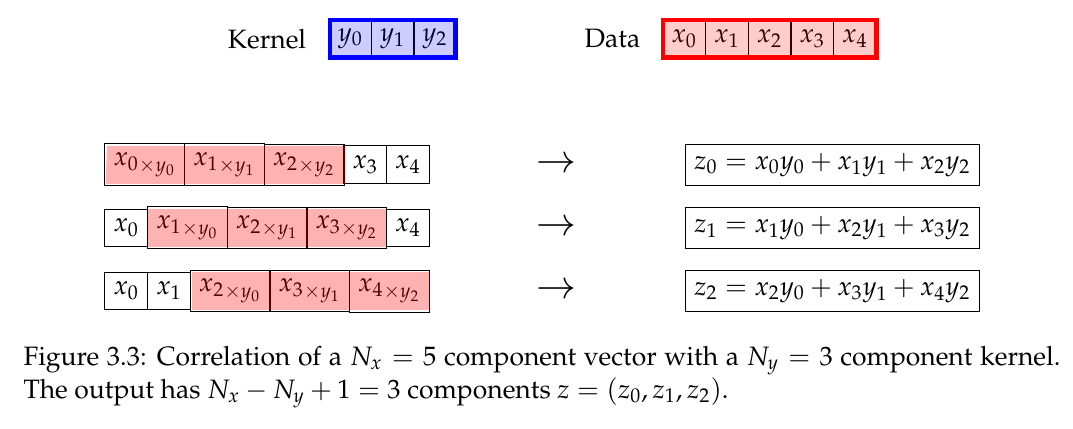

Al filtro tambien lo llaman "kernel".
El numero de muestras de salida es: $ N_x - N_y + 1$.
Veamoslo en este ejemplo

* $N_x = 5$
* $N_y = 3$
* $N_z = 5-3+1=3$.

Como dije antes, el filtro (o kernel) no se sale de los datos. Pero si se puede salir en los bordos con un parametro que se define como **padding**.  El padding se hace agregando ceros (o otros valores) en los bordos para poder hacer el calculo.
El padding se aplica a ambos extremos, se nota con $p$, y con padding se incrementa el numero de datos de salida.

Por ejemplo, si yo quiero que el numero de datos de salida sea $N_x$ (el mismo numero de datos de entrada) yo puedo disenhar un padding

$$p = (N_y - 1)/2 \tag{1} $$
donde $N_y$ es impar (ahora vemos que pasa si es par).

El numero de datos de salida es

$$N_x - N_y + 1 + 2 p = N_x - N_y + 1 + N_y- 1 = N_x $$

La formula (1) nos da un "padding" tal que el numero de muestras de salida es $N_x$. Por eso se le conoce como **same padding** (tambien lo llaman **half padding**)?

Que pasa si $N_y$ es par?

$$N_x - N_y + 1 + 2    \lfloor (N_y -1)/2 \rfloor   $$
Apliquemos esto a un ejemplo. Por ejemplo si $N_y=8$, $N_x=10$.

$$10 - 8 + 1 + 2   \times 3 = 9    $$

Veamos otro ejemplo.

$$N_x = 5 \quad , N_y = 3 $$
$p = (N_y - 1)/2 = 2/2=1$.
$$N_x - N_y + 2p + 1 $$
$N_z = N_x - N_y + 2 (1) = 5 - 3 + 2 + 1 = 5.
Veamos esto de forma grafica.

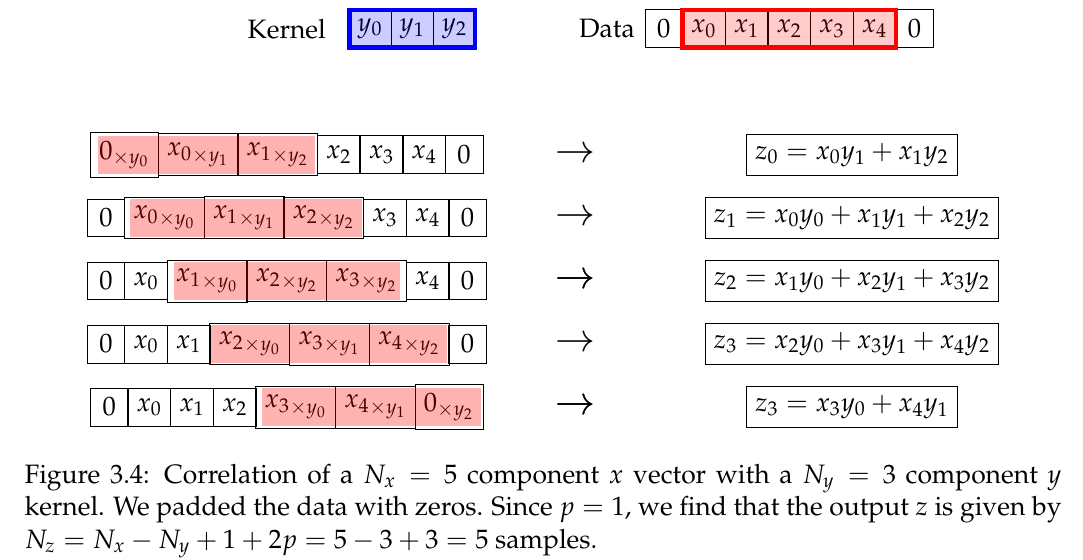

Como hay **half padding** hay **full padding**. Esto ocurre cuando hay un "overlap" (coincidencia) de una sola celda de los datos de entrada con el filtro.
Explicacion fue dada a mano alzada.

**Stride** (salto).

Con el animo de ahorrar recursos (memoria y computo). Entonces se define el **stride** como un salto en los datos de salida. Explico.

$$z_j = x_i \ast y_i = \sum_{i=0}^{N_y -1} y_i x_{i+j}  \quad, \quad j = 0, s, 2d, \cdots, ks \quad , \quad kx \le N_x - N_y $$

Si $s=2$ me muevo de a dos en cada salto.

A las 8:00 pm.


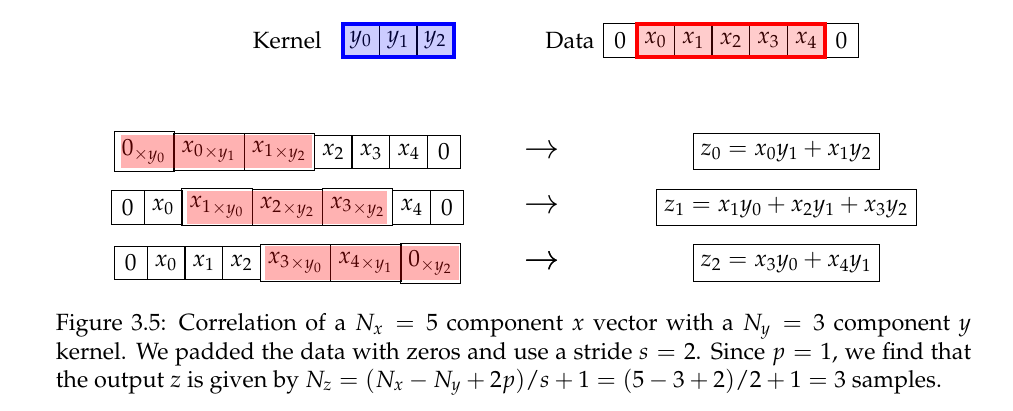

Con stride $s$, el numero de datos de salida es

$$N_z = (N_x - N_y + 2p)/s + 1 $$
Veamos el conteo en el ejemplo de la Figura 3.5

$$N_x = 5 \quad , \quad N_y=3 \quad , \quad p=1 \quad, \quad s=2 $$

De forma que

$$N_z = (5 - 3 + 2)/2 + 1 = 3. $$

La generalizacion de la formula (2) a dos dimensiones

$$h(\tau, \rho) = \int_{D_1} \int_{D_2} f(t, r) g(t + \tau, r + \rho) dt dr $$
Aca $\tau,\rho$ son las variables libres que muestran el "shift" (corrimiento) requerido para extaer una senal usando producto interno y similitudes.

Pasamos al discreto

$$z_{jk} = (x \ast y )_{jk} = \sum_m \sum_n y_{mn} x_{m+j \; n+k}. $$

* El numero de muestras de entrada en $x$ es $M_x N_x$
* El numero de muestras de entrada en $y$ es $M_y, N_y$
Los datos de entrada son $M_x \times N_x$ en tamanho.
El filtro $M_y \times N_y$ en tamanho.

Ahora

$$ m+ j < M_x  \quad , \quad n + k < N_x $$

escribimos con mas precision

$$z_{jk} = (x \ast y )_{jk} = \sum_{m=0}^{M_y-1} \sum_{n=0}^{N_y-1} y_{mn} x_{m+j \; n+k}  $$
$$ j= 0,1, \cdots, M_x - M_y  \quad , \quad k = 0,1, \cdots, , N_x - N_y$$

El tamanho de los datos de salida

$$\#(z_{ij}) = (M_x - M_y +1) \times (N_x - N_y + 1). $$

Si ponemos padding, podemos poner padding en $x$ de un tamanho $P_M$ y en $y$ de otro $p_N$. En este caso

$$\#(z_{ij}) = (M_x - M_y + 2 p_M + 1) \times (N_x - N_y + 2 p_N + 1). $$

El striding para mas tarde.

Veamos ejemplos. Graficos.





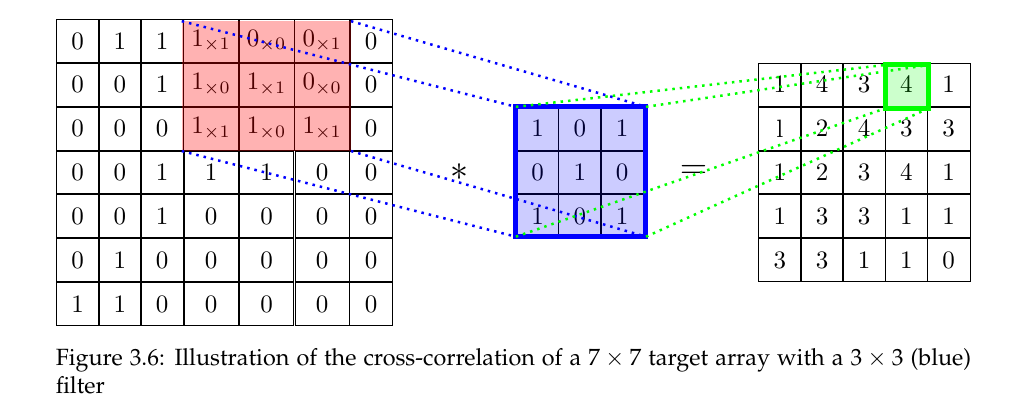

La salida tiene tamanho

$$(M_x - M_y + 1) \times (N_x - N_y + 1) = ( 7 - 3 + 1) \times (7 - 3 + 1) = 5 \times 5 $$
El filtro (kernel) es

$$\begin{pmatrix} 1 & 0 & 1 \\ 0 & 1 & 0 \\ 1 & 0 & 1 \end{pmatrix}  $$

La operacion de producto interno se puede pensar como
* Un producto Hadamard.
* La suma de **todas** las componentes de la matriz resultante.

Por ejemplo, para obtener el 4 en la grafica de la derecha se tiene

\begin{eqnarray}
1 \times 1 + 0 \times 0 + 0 \times 1 &+& \\
1 \times 0 + 1 \times 1 + 0 \times 0  &+&  \\
1 \times 1 + 1 \times 0 + 1 \times 1 &=& 4
\end{eqnarray}
La pagina
[Towards the Data Science](https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939/).

[Vincent Dumoulin](https://github.com/vdumoulin/conv_arithmetic)

De la misma forma que en 1D, podemos incluir el padding, en $x$ y en $y$

Veamos otro ejemplo en la Figura 3.7.

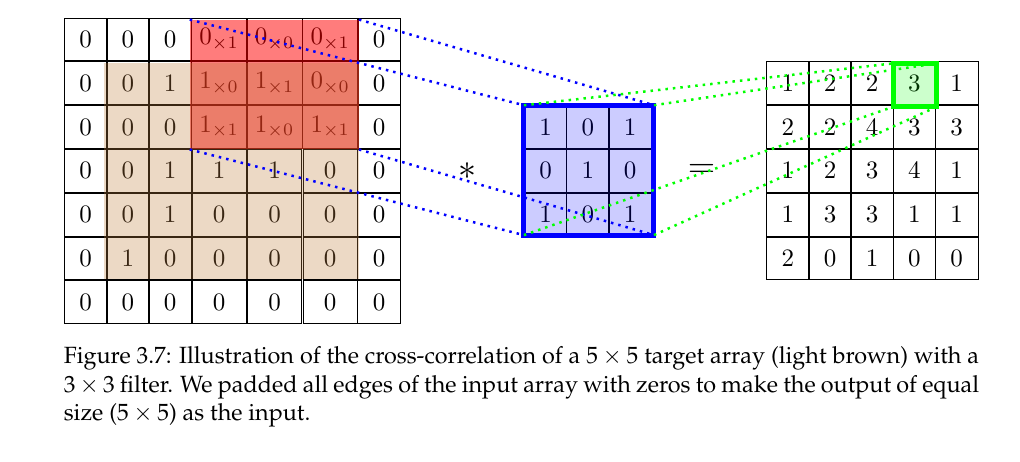

Como los sitemas son cuadrados con los mismos parametros para $x$ , $y$. Contemos solo a lo largo de $x$.

$$N_x - N_y + 2 p + 1 = 5 - 3 + 2 + 1 = 5$$

El striding es lo mismo

La formula con striding para el conteo debe ser

$$ ((N_x - N_y + 2p)/s + 1)  \times ((M_x - M_y + 2p)/s + 1) $$



## Aumentamos una dimension mas.

$$h(\tau, \rho, \xi) = \int_{D_1} \int_{D_2} \int_{D_3} f(t,r,s)
g(t + \tau, r + \rho, s + \xi) dt dr ds  $$

Por que se requieren mas dimensiones? Piense en una grafica, tiene pixeles en $x$ and $y$ y puede tener tres canales. RGB, HSL, HSV, o cuatro canales CMYK.

Cual es la formula en el discreto

$$z_{jkl} = (x \ast y ) = \sum_{m=0}^{M_y-1} \sum_{n=0}^{N_y-1} \sum_{o=0}^{O_y -1} y_{mno} x_{m+j \; n+k \; o + l} $$
con

$$j=0,1, \cdots, M_x - M_y $$
$$k=0,1, \cdots, N_x - N_y $$
$$l=0,1, \cdots, O_x - O_y $$

El tamanho es (sin padding ni striding)
$$(M_x - M_y + 1) \times (N_x - N_y+1) \times (O_x - O_y + 1) $$

El tamanho es (con padding ni striding)
$$(M_x - M_y + 2 p + 1) \times (N_x - N_y+ 2p + 1) \times (O_x - O_y + 2p + 1) $$

El tamanho es (padding y striding)

$$( ( M_x - M_y + 2 p)/s + 1) \times (( N_x - N_y+ 2p)/s + 1) \times ((O_x - O_y)/s + 2p + 1) $$

Veamos un ejemplo grafico.

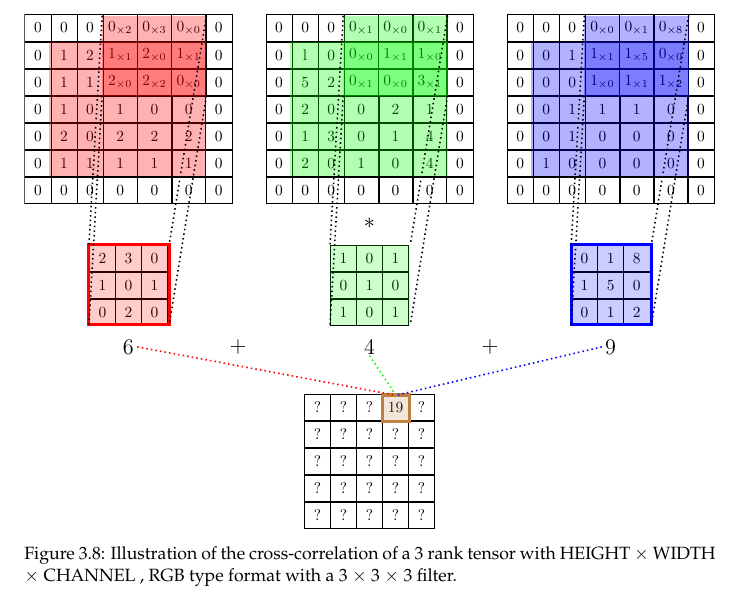

Conteo

$$(5 - 3 + 2 + 1) $$

## Strides

$$z_{jkl} = (x \ast y ) = \sum_{m=0}^{M_y-1} \sum_{n=0}^{N_y-1} \sum_{o=0}^{O_y -1} y_{mno} x_{m+j \; n+k \; o + l} $$
con
con strides en $s_x, s_y, s_z$

$$j=0,s_x, 2 s_x , \cdots, \le M_x - M_y $$
$$k=0,s_y, 2 s_y , \cdots, \le N_x - N_y $$
$$l=0,s_z, 2 s_z , \cdots \le  O_x - O_y $$

Esto puede extender a tensores de rango mas alto (5) por ejemplo piense en una coleccion de peliculas. Los indices varian en  

$$\text{indice de pelicula} \times Altura \times Ancho \times Marco \times Canal  $$

De tarea dejo generalizar las formula de arriba a tensores de cualquier orden.

Ejemplos generados con el software de Vincent Dumoulin.

* No pading no strides




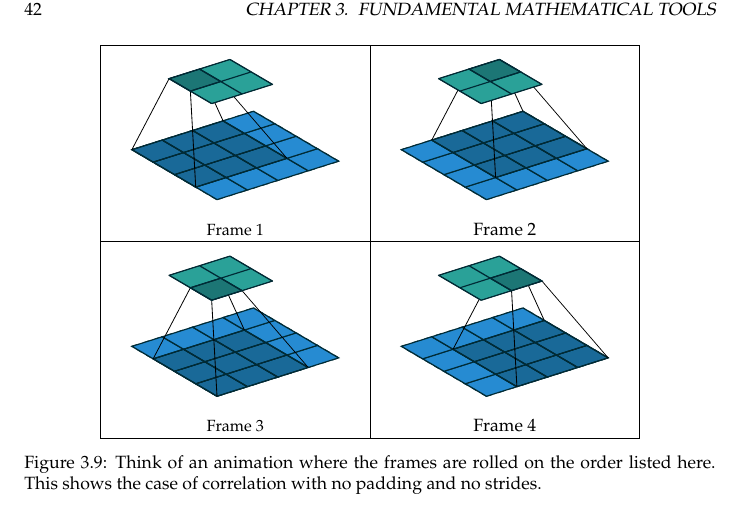

* Full padding no strides.

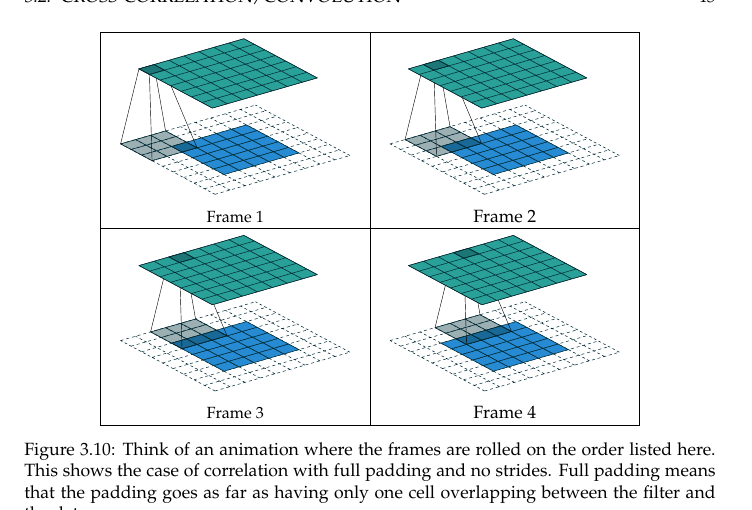

* Padding y Strides

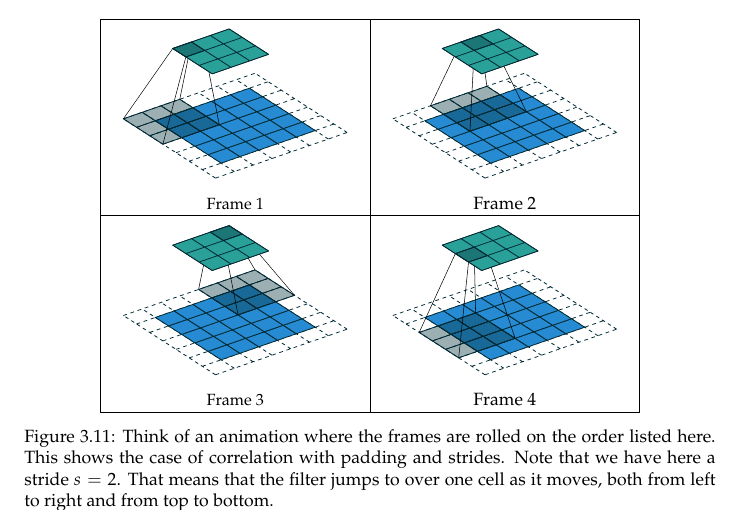

## Convolucion:
Hay dos tipos de filtros importantes en el procesamiento de senales.
El uno es invariante en el tiempo (Time Invariant) y el otro lineal.
Si un filtro cumple los tipos es una convolucion.

Vamos a asumir que tenemos $n$ muestras de datos $\{ x_1, x_2, x_3, \cdots, x_n \}$. Las muestras se sientan en unas abcisas
$\{ t_1, t_2, t_3, \cdots, t_n \}$. El dibjuo 3.12, ilustra esto.


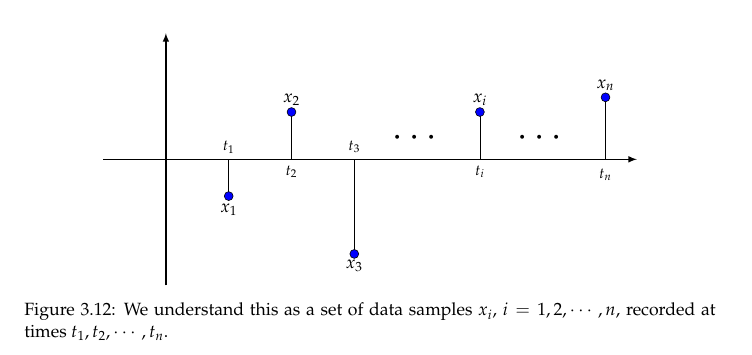

La senal en la Figura 3.12 se puede representar como


$$x_1 \delta(t - t_1) + x_2 \delta(t - t_2) + x_3 \delta(t - t_3)  + \cdots + x_n \delta(t - t_n) = \sum_{i=1}^n x_i \delta(t - t_i). $$

Donde

\begin{eqnarray}
\delta{(t - t_i)} =
\begin{cases}
1   \quad , \quad \text{  si } t = t_i \\
0   \quad , \quad \text{  si } t \ne t_i \\
\end{cases}
\end{eqnarray}

Esta delta es como

$$\delta(t) = \begin{cases}  1  \quad , \quad \text{ si   } t = 0 \\ 0 \quad , \quad \text{si } t \ne 0  \end{cases}  $$

De alguna forma esto se ve como una base canonica en un espacio vectorial $e_i$.

**Respuesta Impulso**: La respuesta impulso es el valor del filtro aplicado a un delta $L(\delta(t)) = f(t)$.

Si queremos que sea invariante con el tiempo, entonces al aplicar un "shift" en tiempo al impulso esto nos crea un shift igual (invariant) en la respuesta impulso. Es decir

**time invariante**.
$$L ( \delta(t - t_i) ) = f(t - t_i)   $$

El segundo postulado es el de la linealidad.

$$L \left ( \sum_{i=1}^n x_i L(\delta(t - t_i)  \right )
= \sum_{i=1}^n x_i  L ( \delta(t - t_i)) = \sum_{i=1}^n x_i f(t - t_i)   $$

Como $f$ opera sobre un conjunto discreto en tiempo con muestras $t_1, t_2, \cdots, t_n$, podemos renombrarlo $y_{j-i}= f(t_j - t_i)$
 y escribir

 $$z_j = \sum_{i=1}^n x_i y_{j-i} $$
 a esto se le llama **convolucion** y escribimos

 $$Z = X \ast Y = \sum_{i=1}^n x_i y_{j-i} $$

 En el continuo

 Piense en

 $$f(t) = L(\delta(t)) $$
 aca $\delta(t)$ es un Delta de Dirac.

 $$f(\tau) = \int_{-\infty}^\infty f(t) \delta(t - \tau) dt $$

 Entonces

 $$z(\tau) = L[ f(\tau)] = L \left [  \int_{-\infty}^\infty f(t) \delta(t - \tau) dt   \right ]  = \int_{-\infty}^\infty f(t) L[\delta(\tau -t)] dt = \int_{-\infty}^\infty f(t) g(\tau - t) dt $$
 donde
 $g(t) = L(\delta(t))$.
 Llegamos a la defincion de **convolucion** en el continuo

 $$ h(\tau) = (f \ast g) ( \tau) = \int_D f(t) g(\tau - t) dt. $$

 Usos:

 1. Para resolver ecuaciones diferenciales. La transformada de Fouier o Laplace manda convoluciones en productos (que son mas faciles de resolver).


 2. Multiplicacion de polinomios. Los coeficientes son convoluciones.

 3. Estadistica: La probabilidad de la suma de dos variables aleatorias $X$, $Y$ es la convolucion de las mismas.

 4. Otros.

 La relacion entre correlacion y convolucion es que la correlacion se puede pensar como una convolucion donde el argumento se reversa. Es decir, si es $g(x)$, para correlacion es $g(-x)$. Lo mismo para $y$.

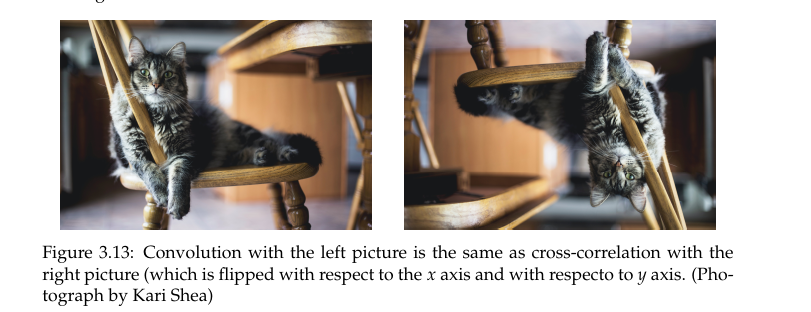